In [28]:
'''
Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does 
the dataset have?
'''

#ans)

import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Examine dimensions
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 10841 rows and 13 columns.


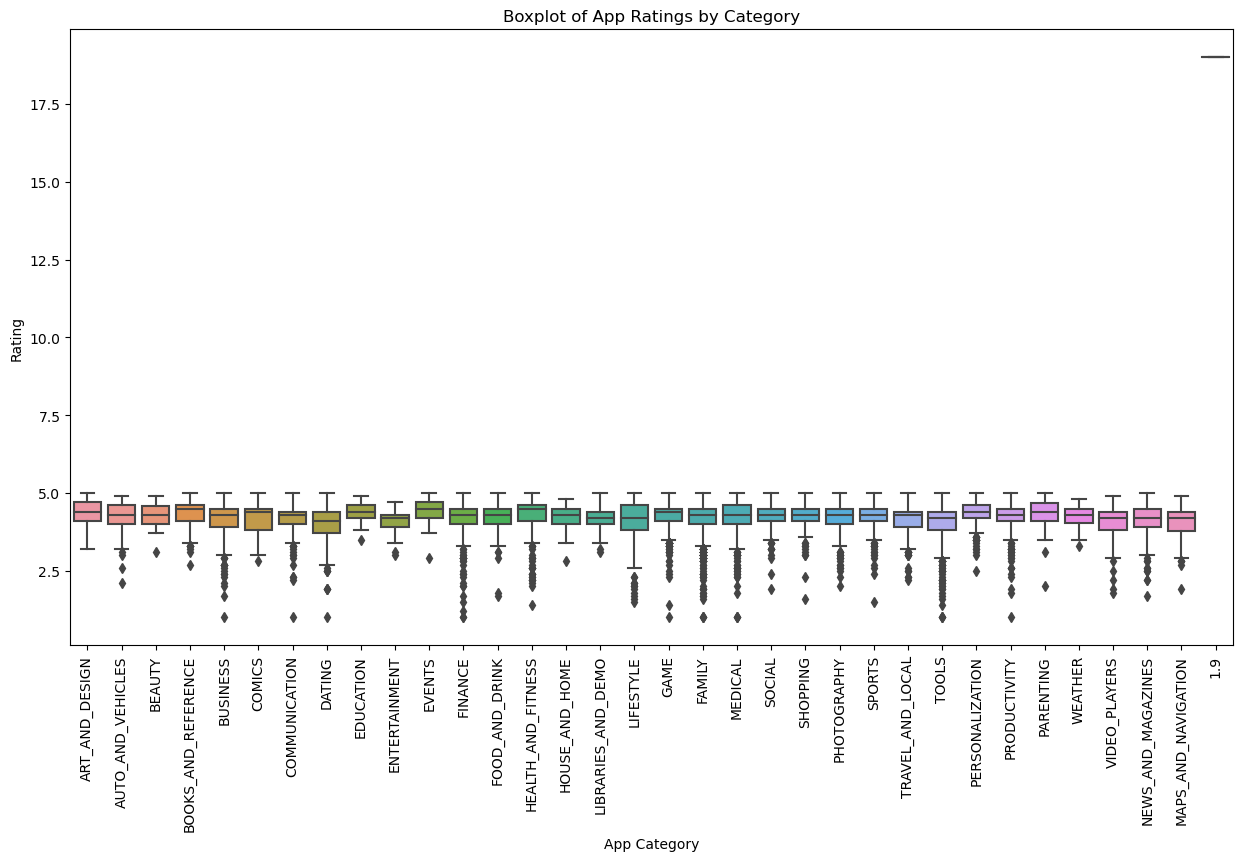

In [29]:
'''
Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different 
app categories.
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Clean the 'Rating' and 'Category' columns
df = df.dropna(subset=['Rating'])  # Remove rows with missing ratings

# Create the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)  # Rotate category labels for better visibility
plt.title('Boxplot of App Ratings by Category')
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.show()


In [30]:
'''
Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may 
impact your analysis.
'''

#ans)

import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the columns with missing values
print("Missing values in each column:\n", missing_values)
print("\nTotal missing values:\n", df.isnull().sum().sum())


Missing values in each column:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Total missing values:
 1487


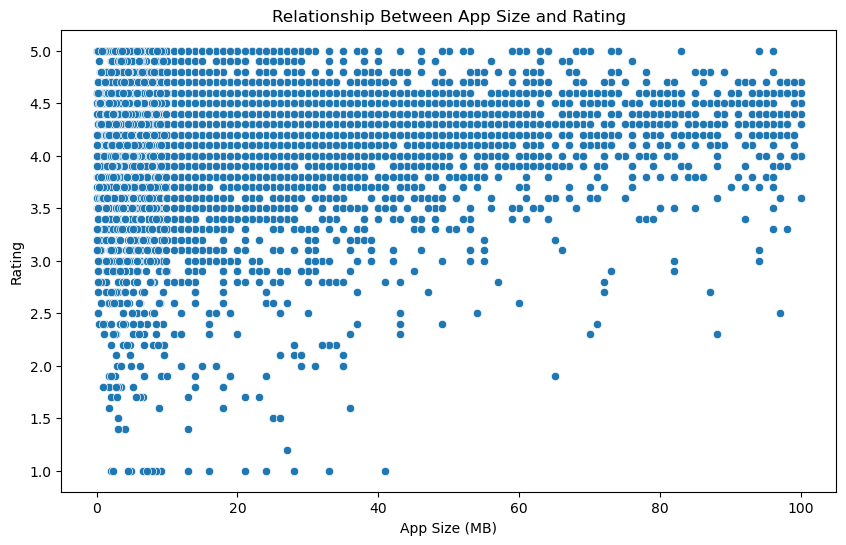

In [31]:
'''
Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize 
the relationship.
'''

#ans)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Remove rows with missing values in 'Size' and 'Rating'
df = df.dropna(subset=['Size', 'Rating'])

# Clean the 'Size' column
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert KB to MB
    else:
        return np.nan  # Handle 'Varies with device' or any other text

df['Size'] = df['Size'].apply(convert_size)

# Drop rows with missing or non-numeric sizes
df = df.dropna(subset=['Size'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('Relationship Between App Size and Rating')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.show()


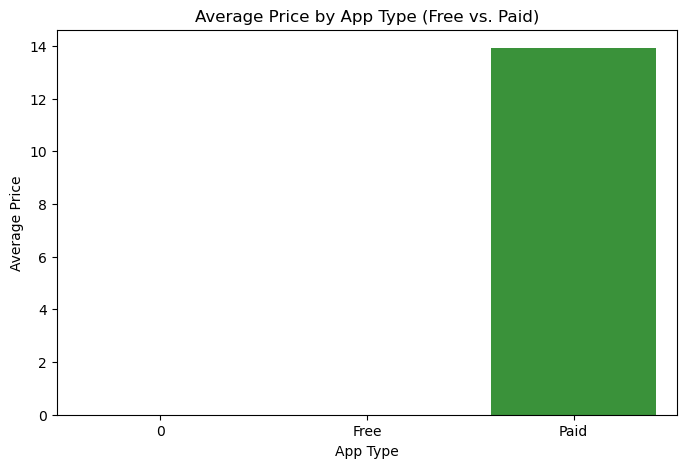

In [32]:
'''
Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
'''
#ans)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Clean the 'Price' column
df['Price'] = df['Price'].replace({'\$': '', 'Everyone': '0'}, regex=True)  # Remove dollar sign and replace non-numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric values, setting invalid parsing as NaN

# Filter out Free apps where price is 0
df_paid = df[df['Price'] > 0]

# Group by 'Type' and calculate average price
avg_price_by_type = df.groupby('Type')['Price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='Price', data=avg_price_by_type)
plt.title('Average Price by App Type (Free vs. Paid)')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()


In [33]:
'''
Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps 
with the highest number of installs.
'''

#Ans)
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Clean the 'Installs' column: remove commas and '+' signs, then convert to numeric
df['Installs'] = df['Installs'].replace({'[+,]': ''}, regex=True)  # Remove commas and plus signs
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric

# Group by 'App' and get the top 10 apps with the highest number of installs
top_10_apps = df.groupby('App')['Installs'].max().sort_values(ascending=False).head(10)

# Create a frequency table
top_10_apps = top_10_apps.reset_index()
print("Top 10 most popular apps by number of installs:")
print(top_10_apps)


Top 10 most popular apps by number of installs:
                             App      Installs
0                          Gmail  1.000000e+09
1             Google Street View  1.000000e+09
2                 Subway Surfers  1.000000e+09
3                       Facebook  1.000000e+09
4  Skype - free IM & video calls  1.000000e+09
5                         Google  1.000000e+09
6   Google Chrome: Fast & Secure  1.000000e+09
7                   Google Drive  1.000000e+09
8                    Google News  1.000000e+09
9              Google Play Books  1.000000e+09


In [34]:
'''
Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the 
Google Playstore dataset to identify the most popular app categories. How would you approach this 
task, and what features would you analyze to make recommendations to the company?
'''

#Ans)

'''
Step 1: Analyze Install Counts by Category
One of the most critical indicators of popularity is the number of installs. 
Grouping the dataset by the Category column and calculating the total and average number of installs for each 
category will help identify which categories attract the most users.
'''
# Group by 'Category' and sum the 'Installs'
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

# Display the top categories by total installs
print(category_installs)


               Category      Installs
0                  GAME  3.508602e+10
1         COMMUNICATION  3.264728e+10
2          PRODUCTIVITY  1.417609e+10
3                SOCIAL  1.406987e+10
4                 TOOLS  1.145277e+10
5                FAMILY  1.025826e+10
6           PHOTOGRAPHY  1.008825e+10
7    NEWS_AND_MAGAZINES  7.496318e+09
8      TRAVEL_AND_LOCAL  6.868887e+09
9         VIDEO_PLAYERS  6.222003e+09
10             SHOPPING  3.247849e+09
11        ENTERTAINMENT  2.869160e+09
12      PERSONALIZATION  2.325495e+09
13  BOOKS_AND_REFERENCE  1.921470e+09
14               SPORTS  1.751174e+09
15   HEALTH_AND_FITNESS  1.583073e+09
16             BUSINESS  1.001915e+09
17              FINANCE  8.766487e+08
18            EDUCATION  8.714520e+08
19  MAPS_AND_NAVIGATION  7.242819e+08
20            LIFESTYLE  5.376435e+08
21              WEATHER  4.261005e+08
22       FOOD_AND_DRINK  2.738988e+08
23               DATING  2.643108e+08
24       HOUSE_AND_HOME  1.687125e+08
25       ART

In [35]:
'''
Step 2: Average Installs Per App in Each Category
While total installs provide a big-picture view, calculating the average installs per app in each 
category gives insight into which categories consistently have successful apps, not just a few 
high-performing ones.
'''
# Group by 'Category' and calculate average installs per app
category_avg_installs = df.groupby('Category')['Installs'].mean().sort_values(ascending=False).reset_index()

# Display the top categories by average installs
print(category_avg_installs)


               Category      Installs
0         COMMUNICATION  8.435989e+07
1                SOCIAL  4.769447e+07
2         VIDEO_PLAYERS  3.555430e+07
3          PRODUCTIVITY  3.343418e+07
4                  GAME  3.066960e+07
5           PHOTOGRAPHY  3.011417e+07
6      TRAVEL_AND_LOCAL  2.662359e+07
7    NEWS_AND_MAGAZINES  2.648876e+07
8         ENTERTAINMENT  1.925611e+07
9                 TOOLS  1.358573e+07
10             SHOPPING  1.249173e+07
11  BOOKS_AND_REFERENCE  8.318050e+06
12      PERSONALIZATION  5.932385e+06
13            EDUCATION  5.586231e+06
14  MAPS_AND_NAVIGATION  5.286729e+06
15               FAMILY  5.201959e+06
16              WEATHER  5.196348e+06
17   HEALTH_AND_FITNESS  4.642441e+06
18               SPORTS  4.560350e+06
19              FINANCE  2.395215e+06
20             BUSINESS  2.178076e+06
21       FOOD_AND_DRINK  2.156683e+06
22       HOUSE_AND_HOME  1.917187e+06
23       ART_AND_DESIGN  1.912894e+06
24            LIFESTYLE  1.407444e+06
25          

In [36]:
'''
Step 3: Analyze Average Ratings
App ratings provide another measure of user satisfaction and engagement. Categories with consistently high ratings might indicate users' positive experiences. 
We can group by Category and analyze the average rating for apps within each category.
'''

# Group by 'Category' and calculate the average rating
category_avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()

# Display the categories with the highest average ratings
print(category_avg_rating)


               Category     Rating
0                   1.9  19.000000
1                EVENTS   4.435556
2             EDUCATION   4.389032
3        ART_AND_DESIGN   4.358065
4   BOOKS_AND_REFERENCE   4.346067
5       PERSONALIZATION   4.335987
6             PARENTING   4.300000
7                  GAME   4.286326
8                BEAUTY   4.278571
9    HEALTH_AND_FITNESS   4.277104
10             SHOPPING   4.259664
11               SOCIAL   4.255598
12              WEATHER   4.244000
13               SPORTS   4.223511
14         PRODUCTIVITY   4.211396
15       HOUSE_AND_HOME   4.197368
16               FAMILY   4.192272
17          PHOTOGRAPHY   4.192114
18    AUTO_AND_VEHICLES   4.190411
19              MEDICAL   4.189143
20   LIBRARIES_AND_DEMO   4.178462
21       FOOD_AND_DRINK   4.166972
22        COMMUNICATION   4.158537
23               COMICS   4.155172
24   NEWS_AND_MAGAZINES   4.132189
25              FINANCE   4.131889
26        ENTERTAINMENT   4.126174
27             BUSIN

In [37]:
'''
Step 4: Compare Free and Paid Apps by Category
Some categories may perform better with free apps (higher downloads and ad revenue), 
while others may do well with paid apps. Comparing free vs. paid app performance in each category 
(in terms of installs and ratings) will give a better idea of the revenue model that works best in each category
'''

# Compare free and paid apps in each category by number of installs and ratings
free_paid_comparison = df.groupby(['Category', 'Type'])['Installs', 'Rating'].mean().reset_index()

# Display the comparison
print(free_paid_comparison)


             Category  Type      Installs     Rating
0                 1.9     0           NaN  19.000000
1      ART_AND_DESIGN  Free  2.005195e+06   4.338983
2      ART_AND_DESIGN  Paid  5.333333e+03   4.733333
3   AUTO_AND_VEHICLES  Free  6.473178e+05   4.184722
4   AUTO_AND_VEHICLES  Paid  1.671667e+04   4.600000
..                ...   ...           ...        ...
59   TRAVEL_AND_LOCAL  Paid  1.525500e+04   4.100000
60      VIDEO_PLAYERS  Free  3.638557e+07   4.062821
61      VIDEO_PLAYERS  Paid  1.775000e+04   4.100000
62            WEATHER  Free  5.747142e+06   4.230882
63            WEATHER  Paid  1.015000e+05   4.371429

[64 rows x 4 columns]


/tmp/ipykernel_119/2474400372.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  free_paid_comparison = df.groupby(['Category', 'Type'])['Installs', 'Rating'].mean().reset_index()


In [50]:
'''
Step 5: Analyze the Impact of App Size
Depending on the category, app size might be important. For example, in gaming, 
users might be willing to download large apps, whereas in utility categories, they may prefer smaller, 
more lightweight apps. Analyzing the average app size by category can guide how large or complex the new 
app should be.

'''

#Ans)

import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Clean the 'Size' column
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024  # Convert KB to MB
        else:
            return np.nan  # Handle 'Varies with device' or any other text
    return np.nan

# Apply the cleaning function to the 'Size' column
df['Size'] = df['Size'].apply(convert_size)

# Drop rows with missing or non-numeric sizes
df = df.dropna(subset=['Size'])

# Group by 'Category' and calculate the average app size
category_avg_size = df.groupby('Category')['Size'].mean().sort_values(ascending=False).reset_index()

# Display the categories with the largest average app size
print(category_avg_size)



               Category       Size
0                  GAME  44.370065
1                FAMILY  28.319023
2      TRAVEL_AND_LOCAL  24.654463
3                SPORTS  24.338822
4    HEALTH_AND_FITNESS  22.768851
5             PARENTING  22.512963
6        FOOD_AND_DRINK  22.185000
7         ENTERTAINMENT  21.853333
8             EDUCATION  20.790600
9     AUTO_AND_VEHICLES  20.036807
10              MEDICAL  19.628456
11              FINANCE  17.928309
12               SOCIAL  17.681671
13          PHOTOGRAPHY  17.367574
14               DATING  16.625555
15  MAPS_AND_NAVIGATION  16.614368
16             SHOPPING  16.175059
17        VIDEO_PLAYERS  16.084441
18       HOUSE_AND_HOME  15.978539
19            LIFESTYLE  14.754111
20             BUSINESS  14.471877
21               EVENTS  13.963617
22               BEAUTY  13.795745
23               COMICS  13.484869
24  BOOKS_AND_REFERENCE  13.310188
25              WEATHER  13.124006
26   NEWS_AND_MAGAZINES  13.023615
27         PRODUCTIV

In [39]:
'''
Step 7: Identify Highly Competitive Categories
Categories with many apps and high download volumes may be saturated. While they might have large user bases,
entering such categories could require a more innovative or differentiated approach. 
Examining the number of apps per category along with the install rates gives insight into category competitiveness.

'''
# Count the number of apps in each category
app_count_by_category = df['Category'].value_counts().reset_index()

# Display the number of apps in each category
print(app_count_by_category)


                  index  Category
0                FAMILY      1972
1                  GAME      1144
2                 TOOLS       843
3               MEDICAL       463
4              BUSINESS       460
5          PRODUCTIVITY       424
6       PERSONALIZATION       392
7         COMMUNICATION       387
8                SPORTS       384
9             LIFESTYLE       382
10              FINANCE       366
11   HEALTH_AND_FITNESS       341
12          PHOTOGRAPHY       335
13               SOCIAL       295
14   NEWS_AND_MAGAZINES       283
15             SHOPPING       260
16     TRAVEL_AND_LOCAL       258
17               DATING       234
18  BOOKS_AND_REFERENCE       231
19        VIDEO_PLAYERS       175
20            EDUCATION       156
21        ENTERTAINMENT       149
22  MAPS_AND_NAVIGATION       137
23       FOOD_AND_DRINK       127
24       HOUSE_AND_HOME        88
25   LIBRARIES_AND_DEMO        85
26    AUTO_AND_VEHICLES        85
27              WEATHER        82
28       ART_A

In [51]:
'''
Step 8: Analyze Paid Apps and Pricing
Analyzing which categories have the most paid apps and how they are priced 
can give insights into whether a paid app or an in-app purchase model might be suitable for the new app.

'''

import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Clean the 'Price' column
def clean_price(price):
    # Remove any dollar signs and commas, then convert to float
    price = price.replace('$', '').replace(',', '')
    try:
        # Convert to float, handle concatenated or invalid entries as NaN
        return float(price)
    except ValueError:
        return np.nan

# Apply the cleaning function to the 'Price' column
df['Price'] = df['Price'].apply(clean_price)

# Filter out rows where Price is NaN
df_paid = df[df['Price'].notna() & (df['Type'] == 'Paid')]

# Group by 'Category' and calculate the average price for paid apps
paid_apps_pricing = df_paid.groupby('Category')['Price'].mean().sort_values(ascending=False).reset_index()

# Display the categories with the highest average paid app price
print(paid_apps_pricing)



               Category       Price
0               FINANCE  170.637059
1             LIFESTYLE  124.256316
2                EVENTS  109.990000
3              BUSINESS   13.233571
4               MEDICAL   13.210642
5                FAMILY   12.747539
6          PRODUCTIVITY    8.961786
7           PHOTOGRAPHY    6.100455
8   MAPS_AND_NAVIGATION    5.390000
9                SOCIAL    5.323333
10            PARENTING    4.790000
11            EDUCATION    4.490000
12               DATING    4.490000
13    AUTO_AND_VEHICLES    4.490000
14  BOOKS_AND_REFERENCE    4.277500
15       FOOD_AND_DRINK    4.240000
16   HEALTH_AND_FITNESS    4.208750
17               SPORTS    4.166667
18     TRAVEL_AND_LOCAL    4.162500
19              WEATHER    4.052500
20        ENTERTAINMENT    3.990000
21                 GAME    3.461446
22                TOOLS    3.426282
23        COMMUNICATION    3.079259
24             SHOPPING    2.740000
25        VIDEO_PLAYERS    2.615000
26   NEWS_AND_MAGAZINES    1

Recommendations to the Company.
1. Choose a Popular Category with Room for Growth:

    1.1. Categories like Games, Social, and Communication often have high installs but might be highly competitive.
    2.1 Categories like Health & Fitness and Education could present opportunities for growth with less saturation but high user interest.

2. Consider User Experience and Ratings:

    2.1. Categories with high average ratings (such as Health & Fitness or Productivity) could indicate a more satisfied user base and a potential focus for new apps.

3. Determine App Size Based on Category:

    3.1 Ensure the app size fits user expectations, particularly in categories like Games (where larger sizes are common) or Tools (where smaller, lightweight apps are preferred).

4. Monetization Strategy:

    4.1 If targeting a category where paid apps are successful (e.g., Medical, Business), the company might consider a paid model. For more competitive categories, offering a free app with in-app purchases or ads could be more effective.


'''
Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the 
most successful app developers. What features would you analyze to make recommendations to the 
company, and what data visualizations would you use to present your findings?
'''

#Ans)

Key Features to Analyze:

1. App Name: Identify the developer and their apps.

2. Category: Analyze the type of apps the developer creates (e.g., Games, Productivity).

3. Rating: High ratings suggest user satisfaction, indicating developer success.

4. Reviews: The number of reviews is an indicator of popularity and user engagement.

5. Installs: The total number of installs reflects the app's reach and popularity.

6. Price: Compare free vs. paid apps to see if successful developers focus on a specific pricing strategy.

7. Content Rating: Check if developers create apps targeting specific age groups.

8. Last Updated: Track the frequency of updates, as regular updates may correlate with higher success.

9. Size: Determine if the size of an app affects its success.

10. Type: Understand if successful developers focus on free or paid apps.

Data Visualization Ideas:

1. Bar Chart (App Count per Developer):
    Visualize the number of apps published by each developer to identify the most prolific developers.

2. Histogram (Distribution of Ratings):
    Show the distribution of ratings for developers' apps to highlight who consistently achieves high ratings.

3. Bubble Chart (Installs vs. Reviews):
    Use a bubble chart to compare the number of installs against the number of reviews, with the size of the bubble representing average rating.

4. Pie Chart (App Type - Free vs. Paid):
    Illustrate the proportion of successful developers' apps that are free vs. paid.

5. Line Chart (Update Frequency):
    Track the update frequency over time for successful developers and correlate with installs and ratings.

6. Heatmap (Category vs. Installs):
    Visualize the relationship between app category and the number of installs to see which categories successful developers focus on.

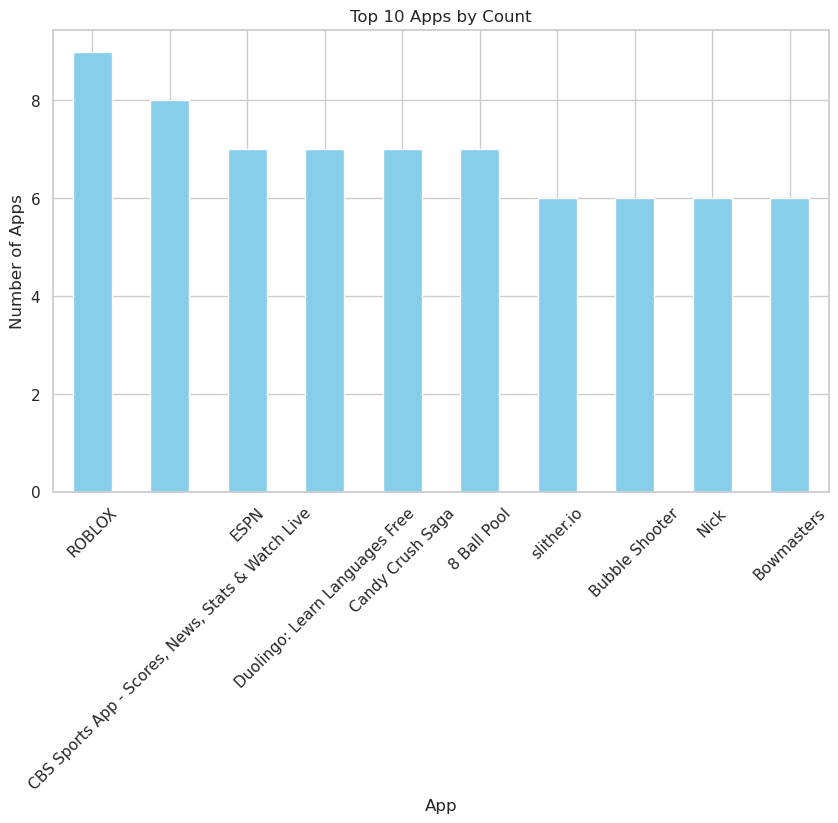

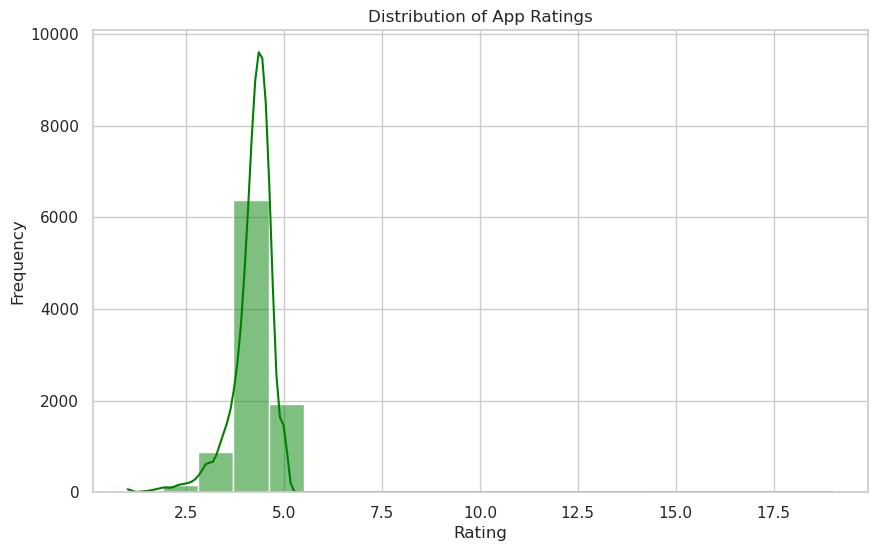

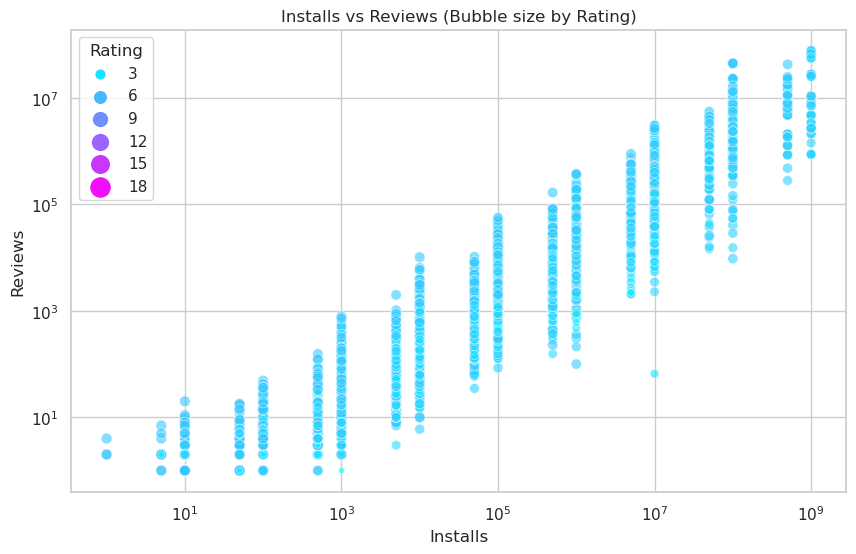

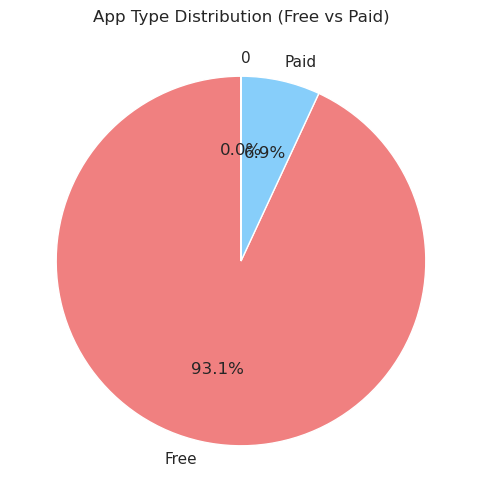

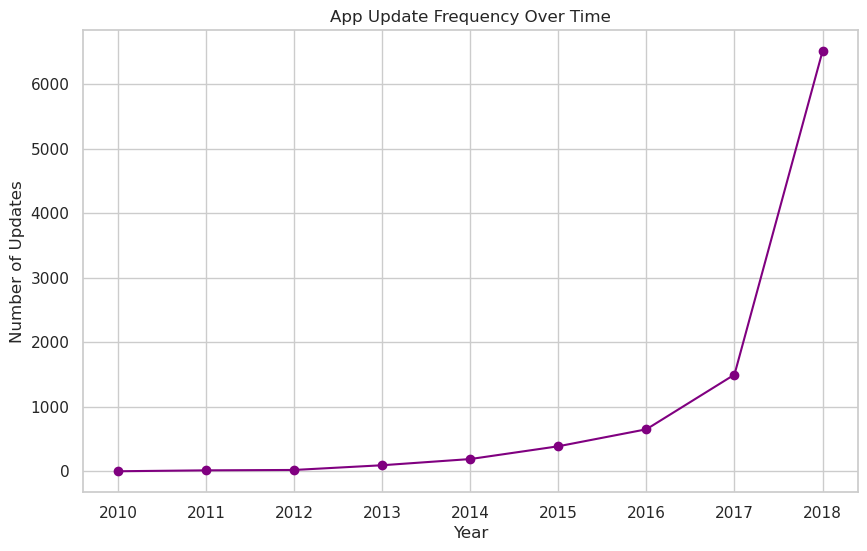

Text(90.04687499999999, 0.5, 'Category')

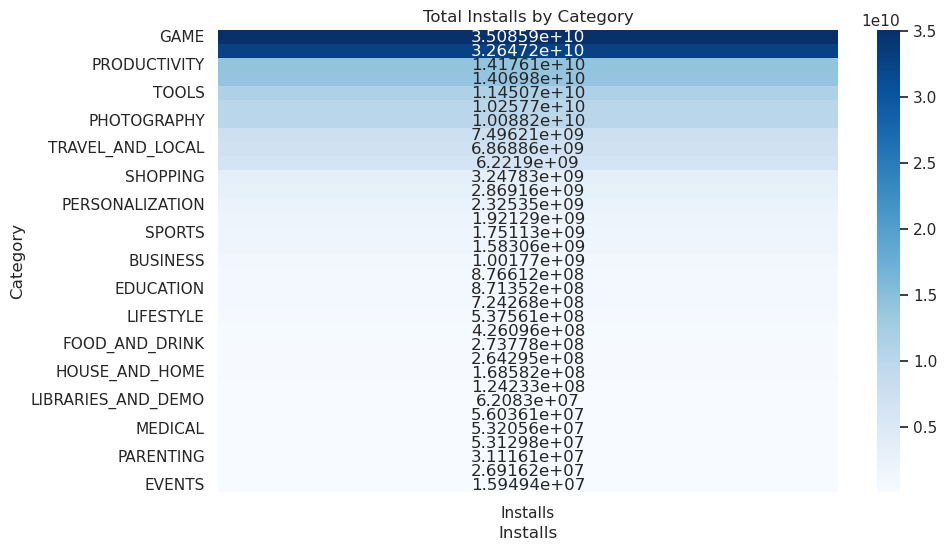

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
df = pd.read_csv(url)

# Preprocessing: Remove invalid data and handle missing values
df.dropna(subset=['Rating', 'Installs', 'Reviews'], inplace=True)

# Convert 'Installs' to string, replace unwanted characters, then convert to integer
# Handle possible non-numeric values by coercing errors
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(r'[,+]', '', regex=True), errors='coerce')

# Convert 'Reviews' to integer, handling errors
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Rating' to float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Fill missing values after conversion with appropriate values (e.g., 0 or mean)
df['Installs'].fillna(0, inplace=True)
df['Reviews'].fillna(0, inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Set seaborn style
sns.set(style='whitegrid')

# ----- Visualization 1: Bar Chart (App Count per Developer) -----
plt.figure(figsize=(10,6))
developer_counts = df['App'].value_counts().head(10)
developer_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Apps by Count')
plt.xlabel('App')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

# ----- Visualization 2: Histogram (Distribution of Ratings) -----
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# ----- Visualization 3: Bubble Chart (Installs vs. Reviews, Size by Rating) -----
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Installs', y='Reviews', size='Rating', sizes=(20, 200), hue='Rating', palette='cool', alpha=0.6)
plt.title('Installs vs Reviews (Bubble size by Rating)')
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.legend(loc='upper left', title='Rating')
plt.xscale('log')  # Use log scale for better visualization of large numbers
plt.yscale('log')
plt.show()

# ----- Visualization 4: Pie Chart (App Type - Free vs Paid) -----
df['Type'].fillna('Free', inplace=True)  # Fill missing 'Type' with 'Free'
type_counts = df['Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('App Type Distribution (Free vs Paid)')
plt.show()

# ----- Visualization 5: Line Chart (App Update Frequency) -----
# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Drop rows where 'Last Updated' could not be converted
df.dropna(subset=['Last Updated'], inplace=True)

# Group by year and count updates
update_counts = df.groupby(df['Last Updated'].dt.year).size()

plt.figure(figsize=(10,6))
update_counts.plot(kind='line', color='purple', marker='o')
plt.title('App Update Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.show()

# ----- Visualization 6: Heatmap (Category vs Installs) -----
# Pivot data for the heatmap
category_installs = df.pivot_table(values='Installs', index='Category', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(category_installs.sort_values(by='Installs', ascending=False), cmap='Blues', annot=True, fmt='g')
plt.title('Total Installs by Category')
plt.xlabel('Installs')
plt.ylabel('Category')
#plt.show()



'''
Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to 
launch a new app. What features would you analyze to make recommendations to the company, and 
what data visualizations would you use to present your findings?
'''

#ans)

Key Features for Analysis:

1. App Category: Analyze which categories (e.g., games, social, education) are trending and have the highest growth.

2. Installs: Evaluate the number of installs to determine which apps are most popular, and identify patterns by category and time.

3. Ratings: High-rated apps can indicate user satisfaction. Analyzing ratings helps understand customer preferences.

4. Reviews: Number of reviews can provide insights into the level of user engagement and customer feedback.

5. App Size: Smaller apps might appeal to users with limited storage space, while larger apps might offer more features.

6. Content Rating: Analyze age group popularity to target specific user demographics.

7. Last Updated: Identify patterns in successful updates and correlate them with performance metrics like installs and ratings.

8. Price: Compare the performance of free vs. paid apps.

9. Release Date: Correlate release dates with performance metrics to identify seasonal trends or ideal launch windows.

10. App Version: Track version history to see if frequent updates correlate with better ratings or installs.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"
data = pd.read_csv(url)

# Display unique values in 'Installs' to understand the format
print("Unique values in 'Installs':", data['Installs'].unique())

# Data cleaning
# Remove rows with missing values in critical columns
data = data.dropna(subset=['Category', 'Installs', 'Reviews', 'Rating', 'Last Updated', 'Type'])

# Remove non-numeric characters and convert columns to numeric
# Convert 'Installs' to string to handle non-numeric characters
data['Installs'] = data['Installs'].astype(str).str.replace(',', '').str.replace('+', '', regex=False)

# Identify and remove invalid values (e.g., rows with non-numeric 'Installs' values)
data = data[data['Installs'].str.isnumeric()]

# Convert to numeric
data['Installs'] = pd.to_numeric(data['Installs'])

# Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Remove rows where conversion failed
data = data.dropna(subset=['Reviews', 'Installs'])

# Convert 'Last Updated' to datetime and extract year
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')
data['Update Year'] = data['Last Updated'].dt.year

# Drop rows where 'Update Year' could not be extracted
data = data.dropna(subset=['Update Year'])

# Visualization: Time Series Plot of Installs by Update Year
plt.figure(figsize=(12, 6))
data.groupby('Update Year')['Installs'].mean().plot(kind='line', marker='o')
plt.title('Average Installs by Update Year')
plt.xlabel('Year')
plt.ylabel('Average Installs')
plt.grid(True)
plt.show()

# Visualization: Bar Chart of App Categories by Number of Installs
plt.figure(figsize=(12, 8))
top_categories = data.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Average Installs')
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.xticks(rotation=90)
#plt.show()

# Visualization: Heatmap of Correlations
plt.figure(figsize=(12, 10))
correlation_matrix = data[['Installs', 'Reviews', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
#plt.show()

# Visualization: Pie Chart of Free vs Paid Apps
plt.figure(figsize=(8, 8))
type_distribution = data['Type'].value_counts()
type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Free vs Paid Apps')
plt.ylabel('')
#plt.show()

# Visualization: Scatter Plot of Ratings vs Installs
plt.figure(figsize=(12, 6))
# Filter out non-finite values
data = data[(data['Rating'].notna()) & (data['Installs'].notna())]
sns.scatterplot(x='Rating', y='Installs', data=data, alpha=0.5, hue='Category', palette='tab10')
plt.title('Scatter Plot of Ratings vs Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
#plt.show()
